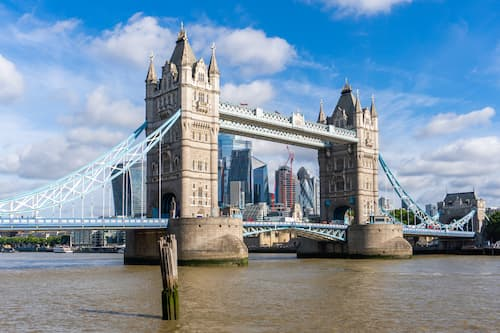

London, or as the Romans called it "Londonium"! Home to over 8.5 million residents who speak over 300 languages. While the City of London is a little over one square mile (hence its nickname "The Square Mile"), Greater London has grown to encompass 32 boroughs spanning a total area of 606 square miles! 

Given the city's roads were originally designed for horse and cart, this area and population growth has required the development of an efficient public transport system! Since the year 2000, this has been through the local government body called **Transport for London**, or *TfL*, which is managed by the London Mayor's office. Their remit covers the London Underground, Overground, Docklands Light Railway (DLR), buses, trams, river services (clipper and Emirates Airline cable car, roads, and even taxis.

The Mayor of London's office make their data available to the public [here](https://data.london.gov.uk/dataset). In this project, you will work with a slightly modified version of a dataset containing information about public transport journey volume by transport type. 

The data has been loaded into a **Snowflake** database called `TFL` with a single table called `JOURNEYS`, including the following data:

## TFL.JOURNEYS

| Column | Definition | Data type |
|--------|------------|-----------|
| `MONTH`| Month in number format, e.g., `1` equals January | `INTEGER` |
| `YEAR` | Year | `INTEGER` |
| `DAYS` | Number of days in the given month | `INTEGER` |
| `REPORT_DATE` | Date that the data was reported | `DATE` |
| `JOURNEY_TYPE` | Method of transport used | `VARCHAR` |
| `JOURNEYS_MILLIONS` | Millions of journeys, measured in decimals | `FLOAT` |

Note that *in Snowflake all databases, tables, and columns are **upper case*** by default.

The questions are: 
1. The most popular transport methods
2. When the London cable car (Emirates Airline) was particularly busy
3. And, identify rare periods when the Underground (also known as "the tube" to locals) was less busy.

In [4]:
-- most_popular_transport_types
SELECT TFL.JOURNEYS.JOURNEY_TYPE, SUM(TFL.JOURNEYS.JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS_MILLIONS
FROM TFL.JOURNEYS
GROUP BY TFL.JOURNEYS.JOURNEY_TYPE
ORDER BY TOTAL_JOURNEYS_MILLIONS DESC

,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,Bus,24905.193947
1,Underground & DLR,15020.466544
2,Overground,1666.845666
3,TfL Rail,411.313421
4,Tram,314.689875
5,Emirates Airline,14.583718


In [5]:
-- emirates_airline_popularity
SELECT MONTH, YEAR, ROUND(JOURNEYS_MILLIONS,2) AS ROUNDED_JOURNEYS_MILLIONS
FROM TFL.JOURNEYS
WHERE TFL.JOURNEYS.JOURNEY_TYPE = 'Emirates Airline' AND ROUNDED_JOURNEYS_MILLIONS IS NOT NULL
ORDER BY ROUNDED_JOURNEYS_MILLIONS DESC
LIMIT 5

,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


In [6]:
-- least_popular_years_tube
SELECT YEAR, JOURNEY_TYPE, SUM(JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS_MILLIONS
FROM TFL.JOURNEYS
WHERE TFL.JOURNEYS.JOURNEY_TYPE LIKE '%Underground%'
GROUP BY YEAR, TFL.JOURNEYS.JOURNEY_TYPE
ORDER BY TOTAL_JOURNEYS_MILLIONS 
LIMIT 5

,YEAR,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.179316
1,2021,Underground & DLR,748.452544
2,2022,Underground & DLR,1064.859009
3,2010,Underground & DLR,1096.145588
4,2011,Underground & DLR,1156.647654


## Conclusion
As we can see from the queries, the most popular transport types are bus with over 24 miilions and the tube with over 15 millions passengers. On April, May and Jun 2012, Emirates Airlines has over 24, 53 and 38 hundred thousands passengers respectively which explain the busy times of summer and people are travelling. On 2013, the most busiest time is on May with over 19 hundred thousands of passengers. Finally, the less busy times for the tube are in 2020 with over 310 millions passengers and 2021 with over 748 passengers since the COVID-19 pandemic occurs and social restrictions limit people travels. 